<a href="https://colab.research.google.com/github/pathakharsh123/Fruit_and_vegetable_detection_system/blob/master/Fruit_vegetable_detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Dataset




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#importing libraries


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


#Data Preprocessing


#Training Image Preprocessing

In [3]:
training_set  = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/dataset/train',
     labels= 'inferred',
     label_mode = 'categorical',
     class_names =  None,
     color_mode= 'rgb',
     batch_size= 32,
     image_size= (64,64),
     shuffle = True,
     seed = None,
     validation_split= None,
     subset = None,
     interpolation = "bilinear",
     follow_links = False,
     crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


#Validation Image Preprocessing

In [4]:
validation_set  = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/dataset/validation',
     labels= 'inferred',
     label_mode = 'categorical',
     class_names =  None,
     color_mode= 'rgb',
     batch_size= 32,
     image_size= (64,64),
     shuffle = True,
     seed = None,
     validation_split= None,
     subset = None,
     interpolation = "bilinear",
     follow_links = False,
     crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


#Building model

In [5]:
cnn = tf.keras.models.Sequential()

##Building convolutional layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3])) # convolutional layer -> feature matrix
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))   # max pool layer created by scanning the feature matrix to generate 2x2 martrix

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))  # doing it again for extracting only important parametres
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.5)) # to avoid overfitting

In [9]:
cnn.add(tf.keras.layers.Flatten()) # flattening process-flattening our 2x2 matrix

In [10]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu')) # for creating neural network

In [11]:
#output layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#compiling and training Phase

In [12]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 [==============================] - 482s 5s/step - loss: 11.0372 - accuracy: 0.0308 - val_loss: 3.5344 - val_accuracy: 0.0684
Epoch 2/30
98/98 [==============================] - 118s 1s/step - loss: 3.9878 - accuracy: 0.0575 - val_loss: 3.6475 - val_accuracy: 0.0855
Epoch 3/30
98/98 [==============================] - 124s 1s/step - loss: 3.6469 - accuracy: 0.0732 - val_loss: 3.4061 - val_accuracy: 0.1282
Epoch 4/30
98/98 [==============================] - 116s 1s/step - loss: 3.8046 - accuracy: 0.1047 - val_loss: 3.0825 - val_accuracy: 0.2308
Epoch 5/30
98/98 [==============================] - 117s 1s/step - loss: 4.0055 - accuracy: 0.1528 - val_loss: 3.2329 - val_accuracy: 0.2308
Epoch 6/30
98/98 [==============================] - 120s 1s/step - loss: 3.4189 - accuracy: 0.2055 - val_loss: 3.9085 - val_accuracy: 0.2479
Epoch 7/30
98/98 [==============================] - 125s 1s/step - loss: 3.0424 - accuracy: 0.2469 - val_loss: 2.6856 - val_accuracy: 0.3561
Epoch 8/30
9

#Saving Model

In [14]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
training_history.history # retruns dictonary of training history having loss,accurracy,valid_loss and valid_accuracy as keys and has values corresponding to these key on 30 epochs

{'loss': [11.037175178527832,
  3.9877712726593018,
  3.6469342708587646,
  3.804581642150879,
  4.005517959594727,
  3.418879985809326,
  3.0424301624298096,
  2.8839664459228516,
  2.7260947227478027,
  2.6281707286834717,
  2.284972667694092,
  2.08322811126709,
  2.100942373275757,
  1.9360884428024292,
  2.0899555683135986,
  1.8619413375854492,
  1.6102113723754883,
  1.5357954502105713,
  1.409188151359558,
  1.7588006258010864,
  1.2933005094528198,
  1.415353536605835,
  1.091858148574829,
  1.1560559272766113,
  1.2273313999176025,
  1.1174232959747314,
  0.9617659449577332,
  1.0233428478240967,
  1.0680361986160278,
  0.9123748540878296],
 'accuracy': [0.030818618834018707,
  0.057463884353637695,
  0.073194220662117,
  0.10465489327907562,
  0.1528089940547943,
  0.20545746386051178,
  0.2468699812889099,
  0.3049759268760681,
  0.3589085042476654,
  0.40802568197250366,
  0.45489567518234253,
  0.5117174983024597,
  0.5361155867576599,
  0.5711075663566589,
  0.6176565289

In [16]:
# recording history in json file
import json
with open('training_hist','w') as f:
  json.dump(training_history.history,f)

In [19]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Calculating accuracy achieved on validation set

In [28]:
print("validation accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

validation accuracy: 88.88888955116272 %


#Accuracy visualization

## Training visualization

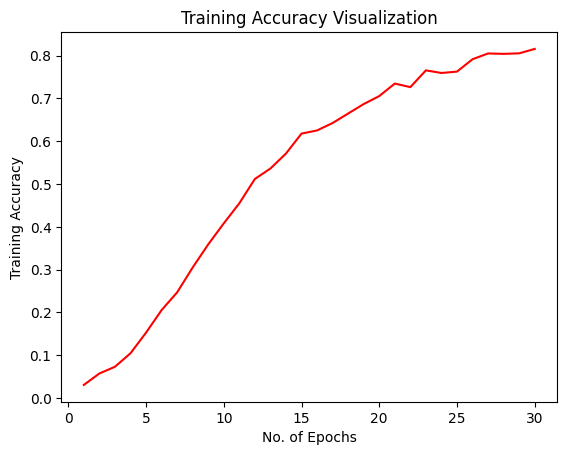

In [34]:
epochs= [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel("No. of Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy Visualization")
plt.show()

##Validation Accuaracy

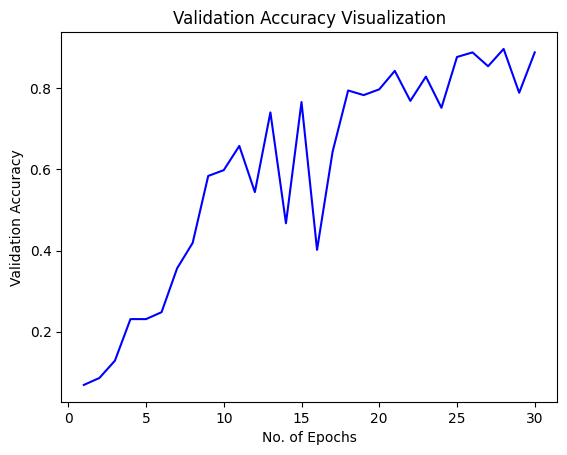

In [36]:
epochs= [i for i in range(1,31)]
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Visualization")
plt.show()